# Feature Extraction

## Emotion Face Classifier Notebook 3

Uses unsupervised decomposition models to extract averaged features of images by category.

In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib inline

In [4]:
from IPython.display import display

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [7]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [8]:
from utils.feature_extraction import perform_unsupervised_analysis

In [9]:
common_dicts = load_json('./configs/input_mappings.json')

In [10]:
emotion_colors = common_dicts['plotly_styles']['Training']['color']

In [11]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [12]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [13]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [14]:
train_df['emotion'].unique()

array(['Angry', 'Fear', 'Sad', 'Neutral', 'Happy', 'Surprise', 'Disgust'],
      dtype=object)

In [15]:
from utils.feature_extraction import perform_unsupervised_analysis

X shape: (28709, 2304), y shape: (28709,)
Total number of analyses to be run: 2

Starting analysis 1/2
Analysis type: NMF
Normalization: minmax
Total components: 30
Parameters: {'init': 'random', 'solver': 'mu', 'beta_loss': 'frobenius', 'max_iter': 1000, 'tol': 1e-05, 'random_state': 42}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Results keys: dict_keys(['model', 'features', 'reconstructions', 'avg_categories', 'unique_categories', 'metrics', 'y', 'component_values', 'n_components', 'model_config'])
Unique categories: ['Overall' 'Angry' 'Happy' 'Surprise']
Component values: [1, 10, 30]
Plotting for NMF with minmax normalization
Number of rows (component values): 3
Number of columns (categories): 4
Plotting row 0, column 0
Image shape: ()
Image range: 0.0000 to 0.0000


ValueError: cannot reshape array of size 1 into shape (48,48)

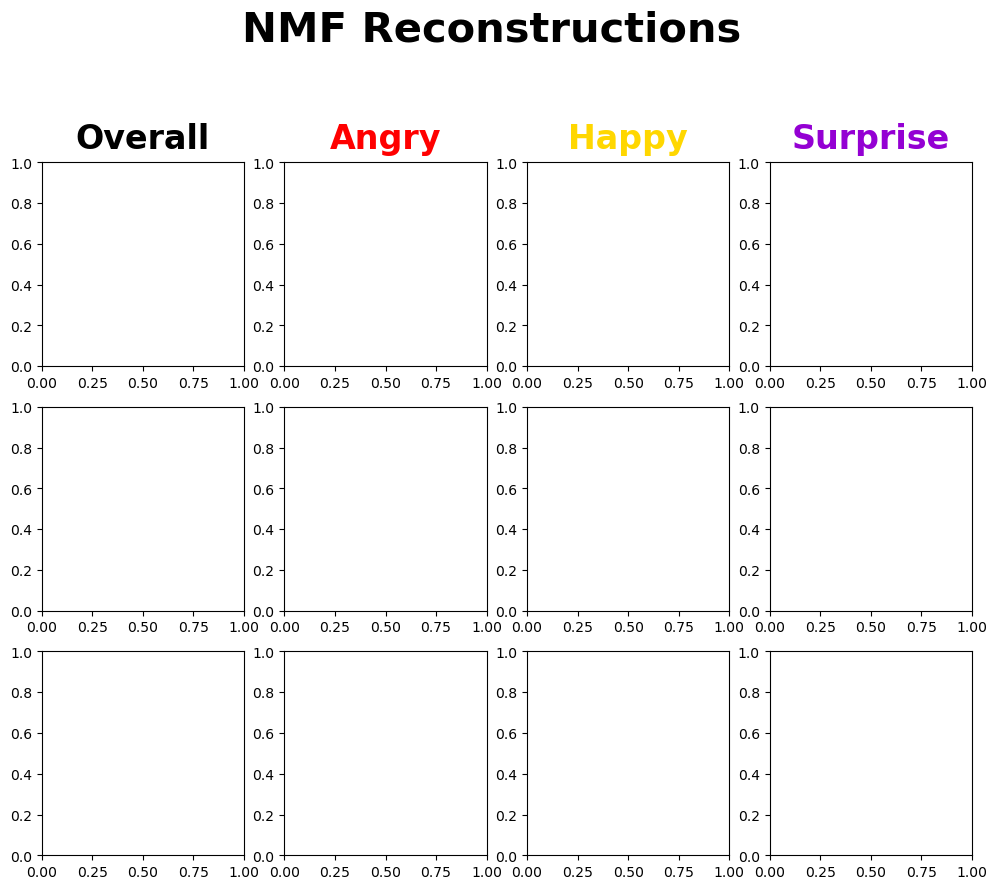

In [16]:
perform_unsupervised_analysis(
    df=train_df,
    img_path_column='img_path',
    label_column='emotion',
    config_path='configs/unsupervised_models_test.json',
    analysis_types=['NMF', 'FastICA'],
    # analysis_types=['PCA', 'NMF', 'FastICA'],
    emotion_colors=emotion_colors,
    flatten=True,
    img_size=None
)

In [ ]:
# from utils.feature_extraction import load_avg_reconstructions

In [ ]:
# file_path = "results/NMF_avg_reconstructions.npz"

In [17]:
# avg_categories, unique_categories, component_values = load_avg_reconstructions(file_path)

In [38]:
import numpy as np

# Create a sample array
arr = np.array([[1, 2, 3, 22, 25], [4, 5, 6, 55, 66], [7, 8, 9, 99, 100], [10, 11, 12, 21, 23]])

print(arr)

[[  1   2   3  22  25]
 [  4   5   6  55  66]
 [  7   8   9  99 100]
 [ 10  11  12  21  23]]


In [40]:
arr.shape

(4, 5)

In [42]:
arr[:,2:]=0

In [44]:
arr

array([[ 1,  2,  0,  0,  0],
       [ 4,  5,  0,  0,  0],
       [ 7,  8,  0,  0,  0],
       [10, 11,  0,  0,  0]])

In [ ]:
from datascifuncs import load_json

In [46]:
test_dict = load_json('configs/unsupervised_models_test.json')

In [51]:
test_dict

{'FastICA': {'module': 'sklearn.decomposition',
  'class': 'FastICA',
  'normalization': 'standard',
  'total_components': 30,
  'components_for_reconstruction': [1, 10, 30],
  'params': {'algorithm': 'parallel',
   'fun': 'logcosh',
   'max_iter': 500,
   'tol': 0.0001,
   'random_state': 42}},
 'NMF': {'module': 'sklearn.decomposition',
  'class': 'NMF',
  'normalization': 'none',
  'total_components': 30,
  'components_for_reconstruction': [1, 10, 30],
  'params': {'init': 'random',
   'solver': 'mu',
   'beta_loss': 'frobenius',
   'max_iter': 1000,
   'tol': 1e-05,
   'random_state': 42}},
 'PCA': {'module': 'sklearn.decomposition',
  'class': 'PCA',
  'normalization': 'standard',
  'total_components': 30,
  'components_for_reconstruction': [1, 10, 30],
  'params': {'svd_solver': 'randomized', 'whiten': True, 'random_state': 42}}}

In [53]:
test_dict['PCA']

{'module': 'sklearn.decomposition',
 'class': 'PCA',
 'normalization': 'standard',
 'total_components': 30,
 'components_for_reconstruction': [1, 10, 30],
 'params': {'svd_solver': 'randomized', 'whiten': True, 'random_state': 42}}

In [63]:
from utils.decomposition_feature_extract import create_X_y

In [59]:
X, y = create_X_y(train_df, 'img_path', 'emotion')

In [67]:
from utils.decomposition_feature_extract import run_single_analysis

In [69]:
run_single_analysis(X, y, test_dict['PCA'])

Analysis type: PCA
Normalization: standard
Total components: 30
Parameters: {'svd_solver': 'randomized', 'whiten': True, 'random_state': 42, 'n_componenets': 30, 'n_components': 30}


TypeError: PCA.__init__() got an unexpected keyword argument 'n_componenets'